<a href="https://colab.research.google.com/github/moustafa-7/H.264-implementation/blob/master/motion_estimation_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [26]:
import numpy as np
import cv2 
import math

# Function to extract frames 
def FrameCapture(path): 
      
    # Path to video file 
    vidObj = cv2.VideoCapture(path)
  
    # Used as counter variable 

    frames = []
    for i in range(2):
      success, image = vidObj.read() 
      frames.append(image)
    

    return frames

  
if __name__ == '__main__': 
  
    # Calling the function 
  frames =  FrameCapture("/content/drive/My Drive/H.264 implementation/bunny.mp4") 

  block_size_1 = 16
  block_size_2 = 16

####################################################################################
# convert the frames into grayscale


  for i in range(len(frames)):
    r, g, b = frames[i][:,:,0], frames[i][:,:,1], frames[i][:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    rows, cols = gray.shape

    rows = rows//block_size_1
    cols = cols//block_size_2

    frames[i] = gray[0:rows*block_size_1, 0:cols*block_size_2]
  
  # print(frames[0].shape)


  motion_vectors = []
  residuals = []
  

####################################################################################


  for i in range(len(frames)-1):
    
    predicted_image = np.zeros((rows* block_size_1, cols * block_size_2))
    for row in range(rows):  # 720 * 1280                # 35 (rows) * 40 (cols) 
      for col in range(cols):
       
              
        search_range_x = range(row*block_size_1 - block_size_1, (row+1)*block_size_1 + block_size_1)
        search_range_y = range(col*block_size_2 - block_size_2, (col +1)*block_size_2 + block_size_2)

        if (row*block_size_1 - block_size_1 < 0):
          search_range_x = range(0, (row+1)*block_size_1 + block_size_1 )
        
        elif(row*block_size_1 + block_size_1 + block_size_1 - 1 >= (rows - 1) * block_size_1):
          search_range_x = range(row*block_size_1 - block_size_1 , (rows - 1)*block_size_1  -1 )



        if (col*block_size_2 - block_size_2 < 0):
          search_range_y = range(0, (col+1)*block_size_2 + block_size_2)
        
        elif(col*block_size_2 + block_size_2 + block_size_2 - 1 >= (cols -1) * block_size_2):
          search_range_y = range(col*block_size_2 - block_size_2 , (cols -1)  * block_size_2  - 1)

        min_diff = math.inf

        for shift_x in search_range_x:
          for shift_y in search_range_y:
            block_temp = frames[i+1][shift_x:shift_x+block_size_1, shift_y:shift_y+block_size_2]
            block = frames[i][row* block_size_1:(row+1) * block_size_1, col*block_size_2:(col+1)*block_size_2]

            diff = np.sum(np.square(block_temp - block))

            if(diff < min_diff):
              min_diff = diff
              x_min = shift_x - row*block_size_1
              y_min = shift_y - col*block_size_2
        
        motion_vectors.append([x_min, y_min])
    
    counter = 0
    for r in range(rows):
      for c in range(cols):
        print( motion_vectors[counter])
        print(predicted_image[r*block_size_1+ motion_vectors[counter][0]:(r+1)*block_size_1+ motion_vectors[counter][0],
                        c*block_size_2+ motion_vectors[counter][1]:(c+1)*block_size_2+motion_vectors[counter][1]
                        ].shape)

        print(frames[i][r* block_size_1:(r+1) * block_size_1, c*block_size_2:(c+1)*block_size_2].shape)
        predicted_image[r*block_size_1+ motion_vectors[counter][0]:(r+1)*block_size_1+ motion_vectors[counter][0],
                        c*block_size_2+ motion_vectors[counter][1]:(c+1)*block_size_2+motion_vectors[counter][1]
                        ] += frames[i][r* block_size_1:(r+1) * block_size_1, c*block_size_2:(c+1)*block_size_2]
        counter = counter + 1
        

    residual = frames[i+1] - predicted_image      
    residuals.append(residual)      


[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)
[0, 0]
(16, 16)
(16, 16)


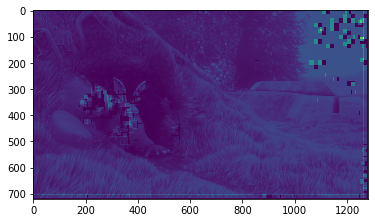

In [27]:
plt.imshow(predicted_image)

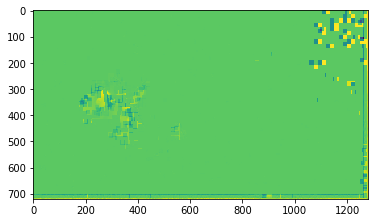

In [28]:
plt.imshow(residual)